In [1]:
import scanpy as sc

In [2]:
adata = sc.read_csv('..practice/data/extracted/GSM5226574_C51ctr_raw_counts.csv').T
adata


AnnData object with n_obs × n_vars = 6099 × 34546

In [4]:
adata.X.shape

(6099, 34546)

## Removing doublets from the dataset 

In [5]:
#pip install scvi-tools

In [6]:
import scvi

In [7]:
sc.pp.filter_genes(adata, min_cells = 10)

In [8]:
adata

AnnData object with n_obs × n_vars = 6099 × 19896
    var: 'n_cells'

In [9]:
sc.pp.filter_genes(adata, min_cells = 10)

In [10]:
#pip install sklearn

In [12]:
pip install scikit-misc

In [13]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [15]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [14]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\sophi\Ironhack\Ironhack\Ironhack_prework_Jupyter\practice\practice_venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|█████████████| 400/400 [45:44<00:00,  6.67s/it, v_num=1, train_loss_step=333, train_loss_epoch=322]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [45:44<00:00,  6.86s/it, v_num=1, train_loss_step=333, train_loss_epoch=322]


In [17]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\sophi\Ironhack\Ironhack\Ironhack_prework_Jupyter\practice\practice_venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\sophi\Ironhack\Ironhack\Ironhack_prework_Jupyter\practice\practice_venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|█████████| 400/400 [08:29<00:00,  1.26s/it, v_num=1, train_loss_step=0.347, train_loss_epoch=0.293]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████| 400/400 [08:29<00:00,  1.27s/it, v_num=1, train_loss_step=0.347, train_loss_epoch=0.293]


In [18]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df.index = df.index.map(lambda x: x[:-2])

df

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1,0.780306,-1.577738,doublet
ATTCACTGTAACAGGC-1,1.049220,-1.373049,doublet
TAACTTCCAACCACGC-1,-0.052407,-2.055022,doublet
TTGGGTACACGACAAG-1,0.699265,-1.083211,doublet
AGGCCACAGAGTCACG-1,0.573807,-0.663198,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1,-1.588189,1.707996,singlet
CACTGGGGTCTACGTA-1,-2.598346,3.126334,singlet
CATACTTGTAGAGGAA-1,-2.685671,2.377460,singlet
TTTGGTTTCCACGGAC-1,-2.729781,3.038041,singlet


In [19]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1247,1247
singlet,4852,4852


In [20]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1,0.780306,-1.577738,doublet,2.358044
ATTCACTGTAACAGGC-1,1.049220,-1.373049,doublet,2.422268
TAACTTCCAACCACGC-1,-0.052407,-2.055022,doublet,2.002616
TTGGGTACACGACAAG-1,0.699265,-1.083211,doublet,1.782476
AGGCCACAGAGTCACG-1,0.573807,-0.663198,doublet,1.237005
...,...,...,...,...
CGCCATTGTTTGCCGG-1,-1.588189,1.707996,singlet,-3.296186
CACTGGGGTCTACGTA-1,-2.598346,3.126334,singlet,-5.724680
CATACTTGTAGAGGAA-1,-2.685671,2.377460,singlet,-5.063132
TTTGGTTTCCACGGAC-1,-2.729781,3.038041,singlet,-5.767822


In [21]:
import seaborn as sns

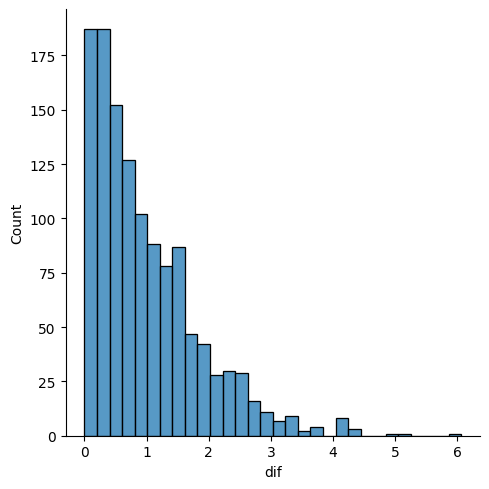

In [22]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')